# gradiant descent basic

In [145]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd

In [146]:
X,y=make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

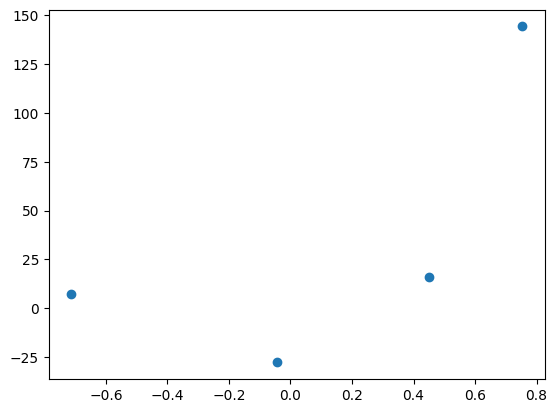

In [147]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [148]:
#lets apply ols
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

In [149]:
lr.coef_

array([78.35063668])

In [150]:
lr.intercept_

np.float64(26.15963284313262)

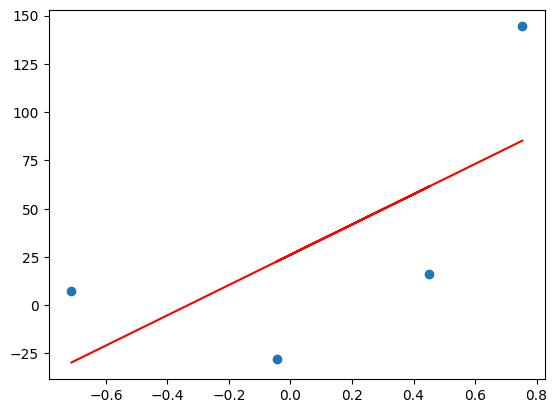

In [151]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red')

In [152]:
 #lets apply gradiant decent method assuming slope is constant m=78.35
 # and let's consider value of b=0
 y_pred=((78.35*X)+0).reshape(4)

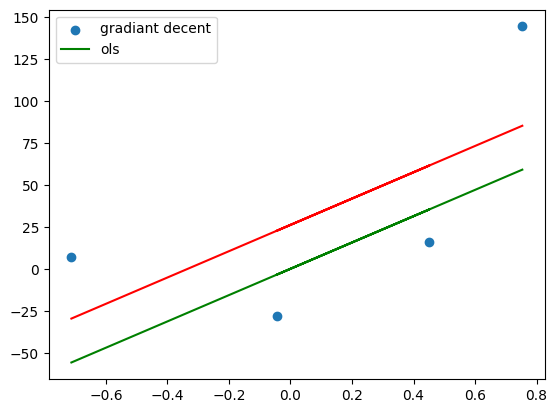

In [153]:
plt.scatter(X,y)
plt.plot(X,y_pred,color='green')
plt.plot(X,lr.predict(X),color='red')
plt.legend(['gradiant decent','ols'])
plt.show()

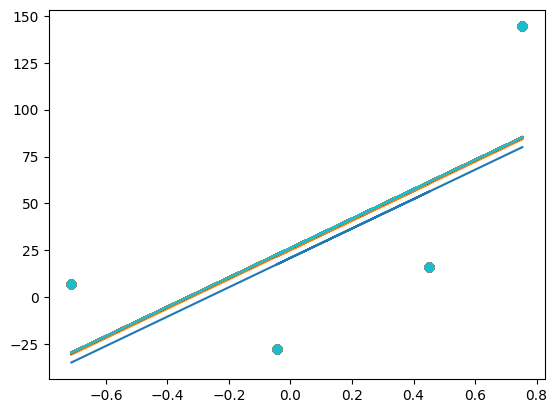

In [154]:
m=78.35
b=0
lr=0.1

ephocs=100

for i in range(ephocs):
    loss_slope=-2*np.sum(y-m*X.ravel()-b)
    b=b-lr*loss_slope

    y_pred = m*X+b
    plt.plot(X,y_pred)
    plt.scatter(X,y)




In [155]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)

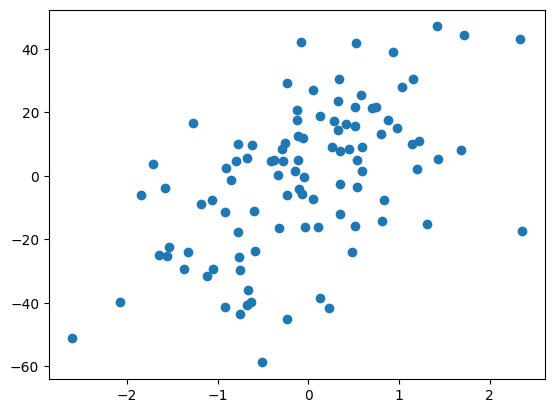

In [156]:
plt.scatter(X,y)

In [157]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [158]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [159]:
lr.coef_

array([12.39926169])

In [160]:
lr.intercept_

np.float64(1.5788194887916196)

In [161]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,X,y,scoring='r2',cv=5).mean()

np.float64(0.11270924558682223)

In [162]:
class GDR:
  def __init__(self,lr,ephocs):



    self.m=100
    self.lr=lr
    self.ephocs=ephocs
    self.b=-120

  def fit(self,X,y):
    #calculate the b using gd
    for i in range(self.ephocs):
      loss_slope_b=-2*np.sum(y-self.m*X.ravel()-self.b)
      loss_slope_m=-2*np.sum(X.ravel()*(y-self.m*X.ravel()-self.b)) #here ravel is for single dimension of x
      self.m=self.m-self.lr*loss_slope_m
      self.b=self.b-self.lr*loss_slope


    print(self.b)
    print(self.m)


In [163]:
gd=GDR(0.01,5)

In [164]:
gd.fit(X,y)

-120.0
-17.782042781543993


# batch gradiant descent (normal gradiant descent )

In [165]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [166]:
X,y=load_diabetes(return_X_y=True)

In [167]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [168]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [169]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [170]:
print(reg.coef_)
print(reg.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [171]:
y_pred=reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568968

In [172]:
class GDRegressor:
  def __init__(self,lr,ephocs):


    self.coef_=None
    self.intercept_=None
    self.lr=lr
    self.ephocs=ephocs

  def fit(self,X_train,y_train):
    #init your coefs
    self.intercept_=0
    self.coef_=np.ones(X_train.shape[1])

    for i in range (self.ephocs):
      #update all the coef and the intercept
      self.intercept_=self.intercept_-(self.lr*np.mean(y_train-np.dot(X_train,self.coef_)))
      self.coef_=self.coef_-(self.lr*np.dot((y_train-np.dot(X_train,self.coef_)),X_train))

    print(self.intercept_,self.coef_)

  def predict(self,X_test):
    return np.dot(X_test,self.coef_)+self.intercept_


In [173]:
gdr=GDRegressor(0.01,1000)

In [174]:
gdr.fit(X_train,y_train)

22904023409938.12 [-4.31832770e+15 -3.09447867e+15 -5.39909750e+15 -4.79299869e+15
 -5.98009321e+15 -6.10757415e+15  4.76977848e+15 -7.19868010e+15
 -6.61730937e+15 -5.54662255e+15]


In [175]:
y_pred=gdr.predict(X_test)

In [176]:
r2_score(y_test,y_pred)


-5.058034335522486e+26

# stochastic gradiant descent

In [177]:
class SGDRegressor:
  def __init__(self,lr=0.01,ephocs=100):


    self.coef_=None
    self.intercept_=None
    self.lr=lr
    self.ephocs=ephocs

  def fit(self,X_train,y_train):
    #init your coefs
    self.intercept_=0
    self.coef_=np.ones(X_train.shape[1])

    for i in range (self.ephocs):
      for j in range(X_train.shape[0]):
        idx=np.random.randint(0,X_train.shape[0])
        y_hat=np.dot(X_train[idx],self.coef_)+self.intercept_
        self.intercept_=self.intercept_-(self.lr*(y_train[idx]-y_hat))
        self.coef_=self.coef_-(self.lr*(y_train[idx]-y_hat)*X_train[idx])


    print(self.intercept_,self.coef_)

  def predict(self,X_test):
    return np.dot(X_test,self.coef_)+self.intercept_

In [178]:
sgd=SGDRegressor(lr=0.01,ephocs=100)

In [179]:
import time
start = time.time()
sgd.fit(X_train,y_train)
print("time taken",time.time()-start)


-5.345120830907049e+154 [-6.51075747e+151  1.39714160e+151  1.81418747e+152  1.86018767e+152
  4.17894915e+152  4.00402240e+152 -9.60713356e+151  2.71717980e+152
  2.58150445e+152 -8.11813346e+151]
time taken 0.35695314407348633


In [180]:
y_pred=sgd.predict(X_test)

In [181]:
r2_score(y_test,y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1275: RuntimeWarning: overflow encountered in square
  numerator = xp.sum(weight * (y_true - y_pred) ** 2, axis=0)


-inf

# mini batch

In [191]:
class BGDRegressor:
  def __init__(self,batch_size,lr=0.01,ephocs=100):


    self.coef_=None
    self.intercept_=None
    self.lr=lr
    self.ephocs=ephocs
    self.batch_size=batch_size

  def fit(self,X_train,y_train):
    #init your coefs
    self.intercept_=0
    self.coef_=np.ones(X_train.shape[1])

    # Calculate the number of batches
    num_batches = X_train.shape[0] // self.batch_size

    for i in range (self.ephocs):
      # Shuffle the indices of the training data at the beginning of each epoch
      shuffled_indices = np.random.permutation(X_train.shape[0])
      X_shuffled = X_train[shuffled_indices]
      y_shuffled = y_train[shuffled_indices]

      for j in range(num_batches):
        # Get the indices for the current mini-batch
        start_idx = j * self.batch_size
        end_idx = min((j + 1) * self.batch_size, X_train.shape[0]) # Ensure we don't go out of bounds
        batch_indices = shuffled_indices[start_idx:end_idx]


        # Use the batch indices to select the mini-batch
        X_batch = X_train[batch_indices]
        y_batch = y_train[batch_indices]

        # Predict y_hat for the current mini-batch
        y_hat = np.dot(X_batch, self.coef_) + self.intercept_

        # Update intercept and coefficients using the mini-batch data
        self.intercept_ = self.intercept_ - (self.lr * np.mean(y_batch - y_hat))
        self.coef_ = self.coef_ - (self.lr * np.dot((y_batch - y_hat), X_batch))


    print(self.intercept_,self.coef_)

  def predict(self,X_test):
    return np.dot(X_test,self.coef_)+self.intercept_

In [192]:
mbr=BGDRegressor(batch_size=int(X_train.shape[0]/50),lr=0.01,ephocs=100)

In [193]:
mbr.fit(X_train,y_train)

-6.11470415094404e+23 [ 1.84942349e+21  6.41501544e+21  9.14262429e+21  1.67827329e+21
  5.70693582e+21  1.01015587e+22 -1.06457802e+22  1.32503418e+22
  2.41129663e+21  5.53715349e+21]


In [194]:
y_pred=mbr.predict(X_test)

In [195]:
r2_score(y_test,y_pred)

-6.75665587359031e+43